# INPUTS

In [1]:
start_point=[30.624801,75.549551]  #Bottom-left point of box
end_point=[31.167619,76.180482] #Top-right point of box
api_key=''  ##INSERT YOUR GOOGLE API KEY HERE

dic_coor=[30.893299,75.864912] 


In [2]:
import requests
import matplotlib.pyplot as plt
from skimage import io
import os
import cv2
import numpy as np
%matplotlib inline

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
import json
import pandas as pd

import datetime
from IPython.display import clear_output

In [3]:
def progressing(start_time,cur_step,total_steps):
    bar_length=50
    cur_time=datetime.datetime.today()
    
    cur_step +=1 ##because loop starts from 0
    elapsed=cur_time-start_time
    total=elapsed/cur_step *total_steps
    left=total-elapsed
    clear_output(wait=True)

    print('Total elapsed: ',elapsed.__str__())
    if cur_step == total_steps:
        print('Time left: 0:00:00.0000')
    else:
        print('Time left: ',left.__str__())
    print('Total Time: ',total.__str__())
    print('\nProgress: [','#'*(int(cur_step/total_steps*bar_length)),'-'*(bar_length-int(cur_step/total_steps*bar_length)),']',np.round(cur_step/total_steps*100,decimals=4),'%')

    
    


In [4]:

width=500
height=300

##DON'T CHANGE THESE VALUES
#lat_dist=0.005406999999998163
#long_dist=0.01268699999999967-0.001973
lat_dist=0.005495000000003358
long_dist=0.01075500000001739
zoom=16


crop_section=0.0004505833333331803
size=str(width)+'x'+str(height)

In [5]:
##area of 1 px in km^2 
px_area=((30.659516000000004 - 30.654021 )*111)/height*((76.27289400000002 - 76.262139)*97)/width 
px_area

px_lat=((30.659516000000004 - 30.654021 )*111)/height
px_long=((76.27289400000002 - 76.262139)*97)/width 



In [6]:
start_lat,end_lat=sorted([start_point[0],end_point[0]])

start_long,end_long=sorted([start_point[1],end_point[1]])

In [7]:
def number(a,b,dist):
    tmp=a
    counter=0
    while tmp< b:
        tmp += dist
        counter +=1
    return counter

In [8]:
h_num=number(start_long,end_long,long_dist)
v_num=number(start_lat,end_lat,lat_dist)

In [9]:
h_num,v_num

(59, 99)

In [10]:
print('Total number of images generated:',h_num*v_num)

Total number of images generated: 5841


# DATA GENERATION

In [11]:
#First run this cell
latitude_list=[start_lat,start_lat+lat_dist]
longitude_list=[start_long,start_long+long_dist]
counter=1
zz=0

directory = os.path.abspath('images')
if not os.path.exists(directory):
    os.makedirs(directory)


zz=i
counter=((zz)*h_num)+1
longitude_list=[start_long,start_long+long_dist]
counter

In [12]:
#Secondly run this cell , if error occur during running of this cell, then run the above markdown cell, then this again 
strt=datetime.datetime.today()
for i in range(zz,v_num):
    for j in range(h_num):
        lat=(latitude_list[0]+latitude_list[1])/2
        long=(longitude_list[0]+longitude_list[1])/2
        img_name='field_'+str(counter)+'_'+str(lat)+','+str(long)+'.png'
        
        img1 = open('temp_image1','wb')
        img2 = open('temp_image2','wb')
        img1.write(requests.get('https://maps.googleapis.com/maps/api/staticmap?center='+str(lat)+','+str(long)+'&zoom='+str(zoom)+'&size='+size+'&maptype=satellite&key='+str(api_key)).content)
        img2.write(requests.get('https://maps.googleapis.com/maps/api/staticmap?center='+str(lat-crop_section)+','+str(long)+'&zoom='+str(zoom)+'&size='+size+'&maptype=satellite&key='+str(api_key)).content)
        img1.close()
        img2.close()
        img1=cv2.imread('temp_image1')
        img2=cv2.imread('temp_image2')
        img1[-25:,:,:]=img2[-50:-25,:,:]
        
        cv2.imwrite('images/'+img_name,img1)
        
        """image = io.imread('images/'+img_name)
        plt.imshow(image)
        plt.show()"""
        
        print(counter)
        print(f"Center:{lat,long}\n Sides:\n{latitude_list[0],longitude_list[0]}\n {latitude_list[1],longitude_list[1]}")
        print('______________________________________')
        
        progressing(strt,counter-1,(h_num*v_num)-1)
        counter += 1
        
        longitude_list=[longitude_list[1] , longitude_list[1]+long_dist]
        #internal loop finished i.e. one row complete
        
    latitude_list=[latitude_list[1] , latitude_list[1]+lat_dist]
    longitude_list=[start_long,start_long+long_dist]

Total elapsed:  0:00:27.575098
Time left:  3:43:12.306902
Total Time:  3:43:39.882000

Progress: [  -------------------------------------------------- ] 0.2055 %


# ATTACHING IMAGES

In [74]:
folder_path='images/'
img_name_to_save='attached_image7.png'

In [ ]:

img_path=os.path.abspath(folder_path)
img_locs=[]
for i in os.listdir(img_path):
    img_locs.append(folder_path+i)

In [ ]:
img_locs.sort(key=lambda x: int(x.split('_')[1]))

# Attached Image (grayscale) for low ram

In [ ]:

final_image=np.zeros(( height*v_num , width*h_num))

imgs=[]
strt=datetime.datetime.today()
for sr,i in enumerate(img_locs):
    imgs.append(cv2.imread(i,0))
    progressing(strt,sr,len(img_locs))
    
counter=0
strt=datetime.datetime.today()
for j in range(v_num-1,-1,-1):
    for i in range(h_num):
        final_image[j*height:j*height+height,i*width:i*width+width]=imgs[counter]
        progressing(strt,counter,v_num*h_num)
        counter += 1


# Attached Image (colored) for high ram

In [ ]:

final_image=np.zeros(( height*v_num , width*h_num,3))

imgs=[]
strt=datetime.datetime.today()
for sr,i in enumerate(img_locs):
    imgs.append(cv2.imread(i))
    progressing(strt,sr,len(img_locs))
    
counter=0
strt=datetime.datetime.today()
for j in range(v_num-1,-1,-1):
    for i in range(h_num):
        final_image[j*height:j*height+height,i*width:i*width+width,:]=imgs[counter]
        progressing(strt,counter,v_num*h_num)
        counter += 1

In [82]:
#Saving Image
cv2.imwrite(img_name_to_save,final_image)

# IMAGE SEGMENTATION

In [ ]:
folder_to_load='images/'
folder_to_save='images-kmeans/'

directory = os.path.abspath(folder_to_save)
if not os.path.exists(directory):
    os.makedirs(directory)

img_path=os.path.abspath(folder)
img_locs=[]
for i in os.listdir(img_path):
    img_locs.append(os.path.join(i))

img_locs.sort(key=lambda x:int(x.split('_')[1]))


In [ ]:
strt=datetime.datetime.today()
for sr,i in enumerate(img_locs):
    img=cv2.imread(folder_to_load+i)
    x,y,z=img.shape
    Z=img.reshape(x*y,z)
    
    
    # convert to np.float32
    Z = np.float32(Z)

    # define criteria, number of clusters(K) and apply kmeans()
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    K = 11
    ret,label,center=cv2.kmeans(Z,K,None,criteria,9,cv2.KMEANS_RANDOM_CENTERS)

    # Now convert back into uint8, and make original image
    center = np.uint8(center)
    res = center[label.flatten()]
    fin = res.reshape((img.shape))
    
    """km.fit(img)
    cluster_centers = km.cluster_centers_
    cluster_labels = km.labels_
    fin=cluster_centers[cluster_labels].reshape(x, y, z)"""
    
    cv2.imwrite(folder_to_save+i,fin)
    progressing(strt,sr,len(img_locs))
    
    #print(i.split('_')[1])

# Masking (getting threshold images)

In [ ]:
folder_to_load='images-kmeans/'
folder_to_save='images-kmeans-thresh/'

directory = os.path.abspath(folder_to_save)
if not os.path.exists(directory):
    os.makedirs(directory)


lower=np.array([20,70,10])
upper=np.array([110,220,230])

strt=datetime.datetime.today()
for sr,i in enumerate(img_locs):
    img=cv2.imread(folder_to_load+i)
    hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    mask=cv2.inRange(hsv,lower,upper)
    
    cv2.imwrite(folder_to_save+i,mask)
    progressing(strt,sr,len(img_locs))

# Representing Top n Patch Area on Image

In [ ]:
#thresholded image
image_to_load='old_data/attached_image6.png'
image_to_save='patched4.png'
n=5 ##n= -0 for all

In [ ]:
img=cv2.imread(image_to_load,0)

"""##inverting image
mask0=img[img==0]
mask255=img[img==255]

img[mask0]=255
img[mask255]=0"""

im2, contours, hierarchy = cv2.findContours(img,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

cntsSorted = sorted(contours, key=lambda x: cv2.contourArea(x))
cnts_temp=[i for i in cntsSorted if cv2.contourArea(i) >=23500.0]

samp_img=cv2.imread(image_to_load)




#cv2.namedWindow('image', cv2.WINDOW_AUTOSIZE)
strt=datetime.datetime.today()
for sr,i in enumerate(cnts_temp[-n:]):
    cv2.drawContours(samp_img, [i], 0, (0,0,255), 2)
    M=cv2.moments(i)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    txt=str(np.round(cv2.contourArea(i)*px_area,decimals=3))+' sq. km ' ##contourarea gives number of pixels
    cv2.putText(samp_img,txt,(cx,cy),cv2.FONT_HERSHEY_DUPLEX,1.4,(55,0,255),1)
    progressing(strt,sr,len(cnts_temp[-n:]))
    """cv2.imshow('image',samp_img)
    cv2.waitKey(2)
cv2.waitKey(5000)
cv2.destroyAllWindows()"""

cv2.imwrite(image_to_save,samp_img)

# Getting Centroid points from image

In [13]:
#threshold image
image_to_load='attached_image6.png'


In [14]:
img=cv2.imread(image_to_load,0)

data=np.ones((1,3)) ##cx,cy,area

im2, contours, hierarchy = cv2.findContours(img,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

cntsSorted = sorted(contours, key=lambda x: cv2.contourArea(x))
cnts_temp=[i for i in cntsSorted if cv2.contourArea(i) >=23500.0]

samp_img=img.copy()


strt=datetime.datetime.today()
#cv2.namedWindow('image', cv2.WINDOW_AUTOSIZE)
for sr,i in enumerate(cnts_temp):
    #cv2.drawContours(samp_img, [i], 0, (0,0,255), 2)
    M=cv2.moments(i)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    ar=np.round(cv2.contourArea(i)*px_area,decimals=3)
    
    data=np.concatenate((data,np.array([cx,cy,ar]).reshape(1,-1)))
    #txt=str(np.round(cv2.contourArea(i)*px_area,decimals=3))+' sq. km ' ##contourarea gives number of pixels
    #cv2.putText(samp_img,txt,(cx,cy),cv2.FONT_HERSHEY_DUPLEX,1.4,(55,0,255),1)
    progressing(strt,sr,len(cnts_temp))

#cv2.imwrite('patched_grouping.png',samp_img)
data=data[1:]

Total elapsed:  0:00:05.710452
Time left: 0:00:00.0000
Total Time:  0:00:05.710688

Progress: [ ##################################################  ] 100.0 %


In [15]:
## Getting number of clusters from area, max area of each cluster should be 1500 acres i.e. 6.0702846 sq.km
max_ar=6.0702846
number_of_clusters=int(np.sum(data[:,2])//max_ar)
number_of_clusters

162

In [16]:
img_height=img.shape[1]
img_height

29500

In [17]:
km=KMeans(n_clusters=number_of_clusters)
km.fit(data[:,:2])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=162, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

# Plotting all Clusters

0 287.755 ['red']
1 2196.8179999999998 ['blue']
2 466.089 ['yellow']
3 805.7140000000002 ['pink']
4 1500.278 ['green']
5 699.504 ['brown']
6 2590.0420000000004 ['cyan']
7 1201.655 ['gray']
8 757.5490000000001 ['red']
9 1102.114 ['blue']
10 824.2389999999999 ['yellow']
11 325.546 ['pink']
12 956.137 ['green']
13 1412.346 ['brown']
14 240.578 ['cyan']
15 553.5269999999999 ['gray']
16 422.61699999999996 ['red']
17 782.496 ['blue']
18 351.72800000000007 ['yellow']
19 2010.8269999999995 ['pink']
20 830.1670000000001 ['green']
21 537.4720000000001 ['brown']
22 16154.787999999999 ['cyan']
23 1954.758 ['gray']
24 606.879 ['red']
25 432.49699999999996 ['blue']
26 541.1769999999999 ['yellow']
27 1121.38 ['pink']
28 433.48499999999996 ['green']
29 1146.574 ['brown']
30 193.895 ['cyan']
31 3266.0809999999997 ['gray']
32 888.706 ['red']
33 911.677 ['blue']
34 246.259 ['yellow']
35 2671.305 ['pink']
36 1533.376 ['green']
37 2376.881 ['brown']
38 1140.1519999999998 ['cyan']
39 798.5509999999999 ['gra

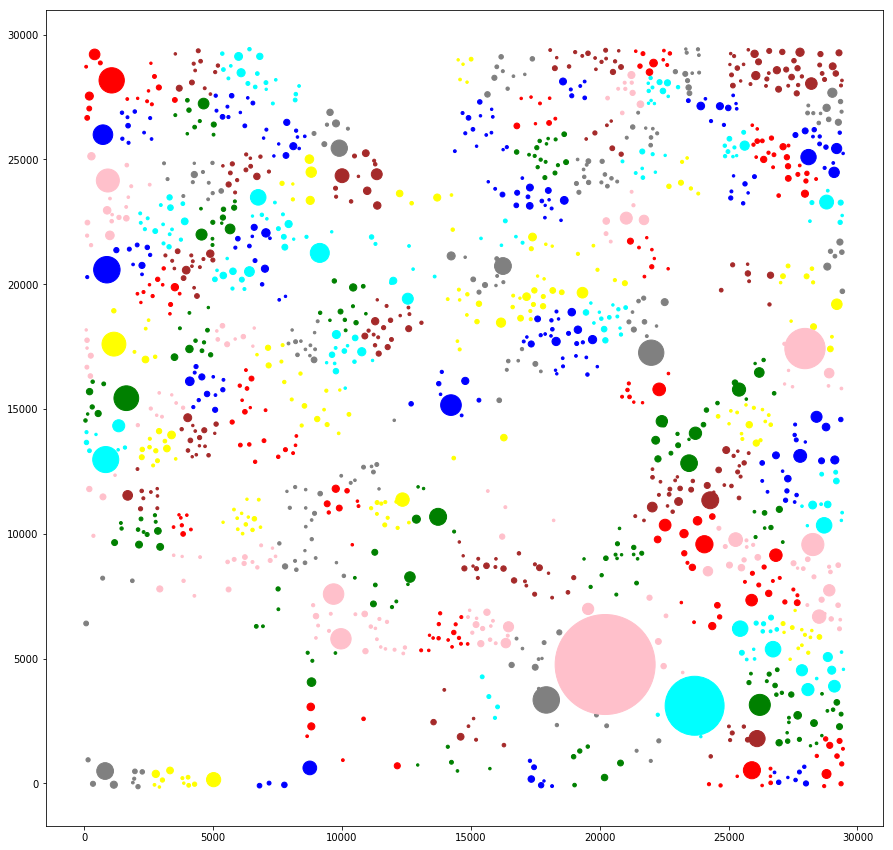

In [18]:
plt.figure(figsize=(15,15))
color_list=['red','blue','yellow','pink','green','brown','cyan','gray']

for sr,i in enumerate(set(km.labels_)):
    cluster_label=np.where(km.labels_==i)[0]
    color=['black' if i==-1 else color_list[sr%len(color_list)]]
    plt.scatter(data[cluster_label,0],img_height-data[cluster_label,1],c=color,s=[data[cluster_label,2]/max(data[:,2])*10000])
    print(i, np.sum(data[cluster_label,2])*247 ,color)


# Plotting Clusters above 1500 acres area

1 10 2196.8179999999998 ['blue']
4 11 1500.278 ['green']
6 11 2590.0420000000004 ['magenta']
19 11 2010.8269999999995 ['lime']
22 11 16154.787999999999 ['yellow']
23 9 1954.758 ['pink']
31 5 3266.0809999999997 ['blue']
35 9 2671.305 ['brown']
36 9 1533.376 ['magenta']
37 12 2376.881 ['cyan']
49 14 2655.0029999999997 ['lime']
54 11 1914.744 ['green']
58 14 1594.138 ['gray']
61 15 2238.3140000000003 ['blue']
63 10 3477.7599999999998 ['pink']
70 9 3891.238 ['red']
72 7 3834.922 ['yellow']
73 9 2436.902 ['pink']
76 6 1644.0320000000002 ['magenta']
78 13 2714.53 ['gray']
83 9 7698.7429999999995 ['pink']
94 6 1904.617 ['green']
96 9 1604.5120000000002 ['magenta']
99 15 1732.4579999999999 ['lime']
100 13 3421.444 ['red']
103 10 1977.7290000000003 ['pink']
105 10 3671.655 ['brown']
107 6 44241.652 ['cyan']
112 9 3158.3889999999997 ['yellow']
114 11 1707.511 ['green']
116 11 2552.498 ['magenta']
127 7 1801.3709999999999 ['cyan']
128 13 2070.354 ['gray']
139 9 3963.8560000000007 ['lime']
141 16 

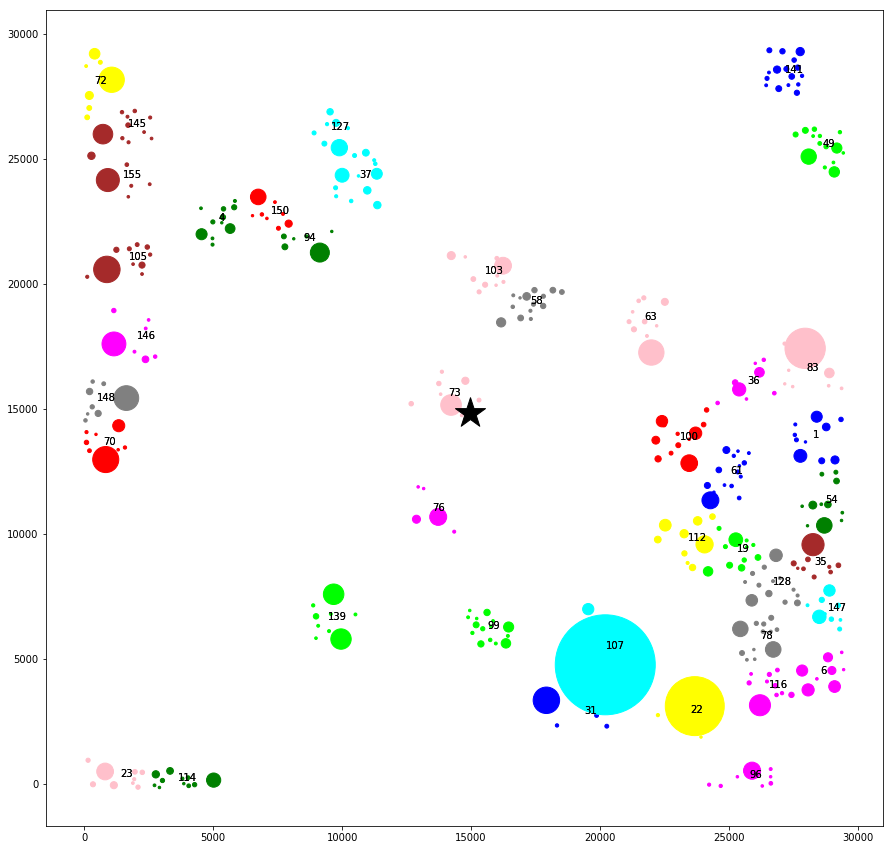

In [19]:
farms=[]

cluster_dict={}

min_area=1500.0

plt.figure(figsize=(15,15))
color_list=['red','blue','yellow','pink','green','brown','magenta','cyan','gray','lime']
counter=0
for sr,i in enumerate(set(km.labels_)):
    cluster_label=np.where(km.labels_==i)[0]
    color=['black' if i==-1 else color_list[sr%len(color_list)]]
    area=np.sum(data[cluster_label,2])*247
    if area >=min_area:
        counter += 1
        plt.scatter(data[cluster_label,0],img_height-data[cluster_label,1],c=color,s=[data[cluster_label,2]/max(data[:,2])*10000])
        plt.annotate(i,(km.cluster_centers_[i][0],img_height-km.cluster_centers_[i][1]))
        plt.annotate(i,(km.cluster_centers_[i][0],img_height-km.cluster_centers_[i][1]))
        farms.extend(list(cluster_label))
        cluster_dict[i]=cluster_label
        print(i,len(data[cluster_label,2]),area  ,color)
print('Total Clusters: ',counter)

##plotting DIC on map

dic_lat=int((end_point[0] - dic_coor[0])*111/px_lat)
dic_long=int((dic_coor[1] - start_point[1])*97/px_long)
plt.scatter(dic_lat,img_height-dic_long,c='black',s=1000,marker='*')

# Creating Dataframes

In [20]:
df=pd.DataFrame(columns=['Origin_Address','Destination_Address','Origin_Coordinates','Destination_Coordinates','Duration','Distance','Cluster_Area(Acres)'])

df2=pd.DataFrame(columns=['Cluster_ID','Cluster_Name','Farm_Coordinates','Farm_Area'])

# Adding Data to Dataframes

In [21]:
desti=str(dic_coor[0])+','+str(dic_coor[1])

strt=datetime.datetime.today()
for sr,i in enumerate(cluster_dict.keys()):
    lats=end_point[0] - (km.cluster_centers_[i,1]*px_lat)/111
    longs=(km.cluster_centers_[i,0]*px_long)/97 + start_point[1]
    area=np.sum(data[list(cluster_dict[i]),2])*247
    
    
    origin=str(lats)+','+str(longs)
    res=requests.get(
        'https://maps.googleapis.com/maps/api/distancematrix/json?units='+'metric'+
        '&origins='+origin+
        '&destinations='+desti+
        '&key='+api_key
    ).json()
    dur=res['rows'][0]['elements'][0]['duration']['text']
    dis=res['rows'][0]['elements'][0]['distance']['text']
    origin_addr=res['origin_addresses'][0]
    desti_addr=res['destination_addresses'][0]
    df.loc[i]=[origin_addr,desti_addr,origin,desti,dur,dis,area]
    progressing(strt,sr,len(cluster_dict.keys()))
    

Total elapsed:  0:00:41.304820
Time left: 0:00:00.0000
Total Time:  0:00:41.304835

Progress: [ ##################################################  ] 100.0 %


In [22]:
counter=0
total=0
for i in cluster_dict.keys():
    total += len(list(cluster_dict[i]))

strt=datetime.datetime.today()
for sr,i in enumerate(cluster_dict.keys()):
    for j in list(cluster_dict[i]):
        lats=end_point[0] - (data[j,1]*px_lat)/111
        longs=(data[j,0]*px_long)/97 + start_point[1]
        
        farm_coor=str(lats)+','+str(longs)
        farm_area=data[j,2]*247
        
        df2.loc[counter]=[i,df.loc[i,'Origin_Address'],farm_coor,farm_area]
        progressing(strt,counter,total)
        counter += 1
        

Total elapsed:  0:00:03.430057
Time left: 0:00:00.0000
Total Time:  0:00:03.429874

Progress: [ ##################################################  ] 100.0 %


In [23]:
distance=[]
for i in df.Distance.values:
    distance.append(float(i.split(' ')[0]))

df['Distance_derived']=distance
df['Distance_x_Area']=df['Cluster_Area(Acres)'] / distance

# Presenting Results Top n Recommendations

In [24]:
n=6

In [25]:
dd=df.nsmallest(n,columns='Distance_derived') #BAsed on min distance

In [26]:
dd=df.nlargest(n,columns='Distance_x_Area') #Based on max of Area_per_distance

# Plotting Results

1 2196.8179999999998 ['red']
4 1500.278 ['blue']
6 2590.0420000000004 ['yellow']
19 2010.8269999999995 ['pink']
22 16154.787999999999 ['green']
23 1954.758 ['brown']
31 3266.0809999999997 ['magenta']
35 2671.305 ['cyan']
36 1533.376 ['gray']
37 2376.881 ['lime']
49 2655.0029999999997 ['red']
54 1914.744 ['blue']
58 1594.138 ['yellow']
61 2238.3140000000003 ['pink']
63 3477.7599999999998 ['green']
70 3891.238 ['brown']
72 3834.922 ['magenta']
73 2436.902 ['cyan']
76 1644.0320000000002 ['gray']
78 2714.53 ['lime']
83 7698.7429999999995 ['red']
94 1904.617 ['blue']
96 1604.5120000000002 ['yellow']
99 1732.4579999999999 ['pink']
100 3421.444 ['green']
103 1977.7290000000003 ['brown']
105 3671.655 ['magenta']
107 44241.652 ['cyan']
112 3158.3889999999997 ['gray']
114 1707.511 ['lime']
116 2552.498 ['red']
127 1801.3709999999999 ['blue']
128 2070.354 ['yellow']
139 3963.8560000000007 ['pink']
141 1750.489 ['green']
145 2173.106 ['brown']
146 2890.888 ['magenta']
147 1793.961 ['cyan']
148 325

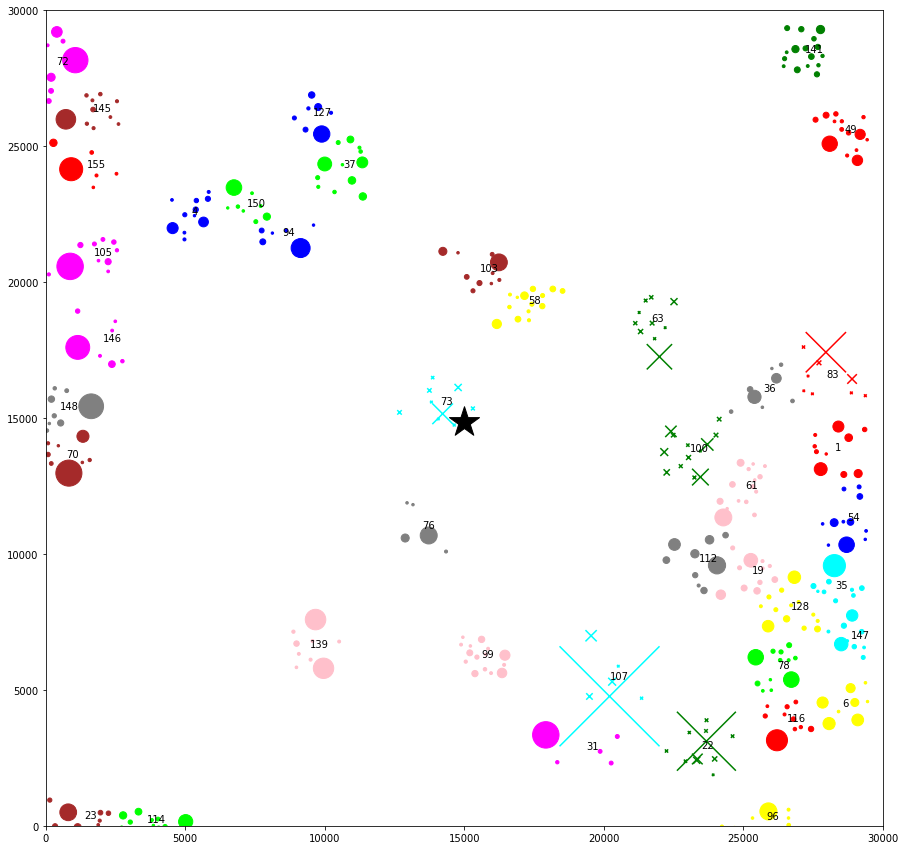

In [27]:
plt.figure(figsize=(15,15))
plt.xlim(0,30000)
plt.ylim(0,30000)
for sr,i in enumerate(cluster_dict.keys()):
    cluster_label=list(cluster_dict[i])
    color=['black' if i==-1 else color_list[sr%len(color_list)]]
    if i in dd.index:
        mark='x'
    else:
        mark='o'
    plt.scatter(data[cluster_label,0],img_height-data[cluster_label,1],marker=mark,c=color,s=[data[cluster_label,2]/max(data[:,2])*10000])
    plt.annotate(i,(km.cluster_centers_[i][0],img_height-km.cluster_centers_[i][1]))
    print(i, np.sum(data[cluster_label,2])*247 ,color)

##plotting DIC on map

dic_lat=int((end_point[0] - dic_coor[0])*111/px_lat)
dic_long=int((dic_coor[1] - start_point[1])*97/px_long)
plt.scatter(dic_lat,img_height-dic_long,c='black',s=1000,marker='*')

In [29]:
df


,Origin_Address,Destination_Address,Origin_Coordinates,Destination_Coordinates,Duration,Distance,Cluster_Area(Acres),Distance_derived,Distance_x_Area
1,"Unnamed Road, Punjab 141115, India","Kucha No. 4-5, Main Rd, Near Punjab Trade Cent...","30.88067742666649,76.15784734700098","30.893299,75.864912",52 mins,41.5 km,2196.818,41.5,52.935373
4,"Unnamed Road, Bilga, Punjab 144036, India","Kucha No. 4-5, Main Rd, Near Punjab Trade Cent...","31.03961214242416,75.66185471000017","30.893299,75.864912",48 mins,31.1 km,1500.278,31.1,48.240450
6,"Unnamed Road, Ikolahi, Punjab 141401, India","Kucha No. 4-5, Main Rd, Near Punjab Trade Cent...","30.707870666666384,76.16354026181916","30.893299,75.864912",45 mins,39.0 km,2590.042,39.0,66.411333
19,"Unnamed Road, Chak Sarai, Punjab 141417, India","Kucha No. 4-5, Main Rd, Near Punjab Trade Cent...","30.797399203030075,76.09429175000088","30.893299,75.864912",40 mins,29.9 km,2010.827,29.9,67.251739
22,"Aluna Miana, Aloona Miana, Punjab 141413, India","Kucha No. 4-5, Main Rd, Near Punjab Trade Cent...","30.67981119848455,76.05502426727354","30.893299,75.864912",44 mins,35.2 km,16154.788,35.2,458.942841
23,"Jalaldiwal Rd, Punjab 141109, India","Kucha No. 4-5, Main Rd, Near Punjab Trade Cent...","30.63219841111078,75.57954311000005","30.893299,75.864912",1 hour 6 mins,44.7 km,1954.758,44.7,43.730604
31,"Unnamed Road, Lehal, Punjab 141119, India","Kucha No. 4-5, Main Rd, Near Punjab Trade Cent...","30.6786299399997,75.96636747800066","30.893299,75.864912",52 mins,33.5 km,3266.081,33.5,97.494955
35,"Ajloud, Punjab 141114, India","Kucha No. 4-5, Main Rd, Near Punjab Trade Cent...","30.78762957407384,76.15863533000098","30.893299,75.864912",48 mins,35.8 km,2671.305,35.8,74.617458
36,"Rajool Koom Kalan Link Rd, Rajool, Punjab 1411...","Kucha No. 4-5, Main Rd, Near Punjab Trade Cent...","30.92035621111096,76.10291248000088","30.893299,75.864912",52 mins,30.3 km,1533.376,30.3,50.606469
37,"Jammu - Delhi Road, Punjab 144035, India","Kucha No. 4-5, Main Rd, Near Punjab Trade Cent...","31.071151222222163,75.77924015750037","30.893299,75.864912",38 mins,26.9 km,2376.881,26.9,88.359888


#LAT -> 0.6099450000003728 km ==> (30.659516000000004 - 30.654021 )*111

#LONG -> 1.0432350000016868 km ==> (76.27289400000002 - 76.262139)*97

1px lat val (vertical) 0.0020331500000012426 km

#1px long val (horizontal) 0.0020864700000033736 km

#Area of 1px -> 4.2421064805094516e-06 km^2